# This Code loads a file, displays the datapoints and calculates a best curve fit through the data.

## In a first step we import the libaries needed

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## In the next step we load the data file:

In [9]:
# Import data that should be fitted
df = pd.read_csv("sinevalues.csv", sep=";")

# x- und y-Werte auslesen
x = df["x"].values
y = df["y"].values

## In the next step the fit function is defined and the curve fit is performed

In [10]:
def sine_function(x, A, B, C, D):
    return A * np.sin(B * (x + C)) + D

from scipy.optimize import curve_fit

# Initial guess for the parameters [A, B, C, D]
initial_guess = [14, 0.4, -4.5, 4]

# Perform the curve fitting
params, covariance = curve_fit(sine_function, x, y, p0=initial_guess)

# Extract the fitted parameters
A_fit, B_fit, C_fit, D_fit = params

print(f"Fitted parameters: A={round(A_fit,3)}, B={round(B_fit,3)}, C={round(C_fit,3)}, D={round(D_fit,3)}")

Fitted parameters: A=12.522, B=0.533, C=-4.002, D=4.389


## The data for drawing the line are produced and fit curve and data points are displayed

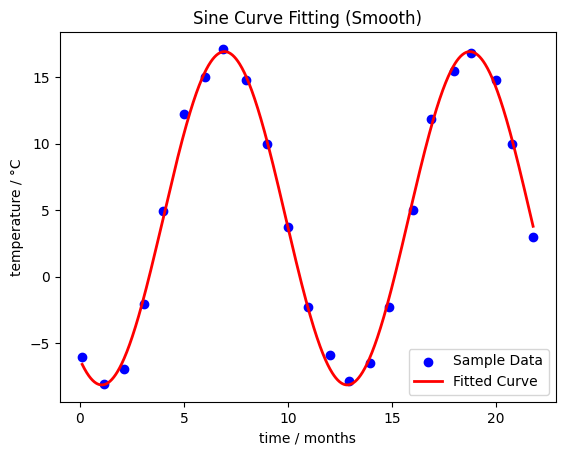

In [14]:
# Generate y values using the fitted parameters
y_fit = sine_function(x, A_fit, B_fit, C_fit, D_fit)

# **Smooth x-grid**
x_smooth = np.linspace(min(x), max(x), 1000)
y_smooth = sine_function(x_smooth, A_fit, B_fit, C_fit, D_fit)

plt.scatter(x, y, label="Sample Data", color="blue")
plt.plot(x_smooth, y_smooth, label="Fitted Curve", linewidth=2, color="red")

plt.xlabel("time / months")
plt.ylabel("temperature / °C")
plt.title("Sine Curve Fitting (Smooth)")
plt.legend()
plt.show()

## If needed the value at a certain time can be calculated

In [13]:
while True:
    answer = input("Evaluate fitted function at a specific x-value? (y/N): ").strip().lower()

    # Default: no
    if answer == "" or answer.startswith("n"):
        print("Okay. Have a nice day!")
        break

    if answer.startswith("y"):
        try:
            x_val = float(input("Please enter the x-value: "))
            y_val = sine_function(x_val, A_fit, B_fit, C_fit, D_fit)
            print(f"f({x_val}) = {round(y_val,3)}")
        except ValueError:
            print("That is not a valid number.")
    else:
        print("Please answer with 'y' or 'n'.")

Evaluate fitted function at a specific x-value? (y/N):  y
Please enter the x-value:  4.5


f(4.5) = 7.671


Evaluate fitted function at a specific x-value? (y/N):  N


Okay. Have a nice day!
